### Testing Breath-First-Search Algorithm

In [73]:
from data.graph_data import *
import ba_utils.visualization as visualization
import ba_utils.orderings as orderings
import ba_utils.neighborhoods as neighborhoods

import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [88]:
# nodes with higher weights: come first
# nodes with equal weights:  sorted by their ID in ascending order
def sort_by_weight(graph, node):
            return sorted(graph.neighbors(node), 
                  key=lambda neighbor: (-graph[node][neighbor].get('weight', 1), neighbor))

# nodes with equal weights:  sorted by their ID in descending order
def sort_by_weight_desID(graph, node):
    return sorted(graph.neighbors(node), 
                  key=lambda neighbor: (-graph[node][neighbor].get('weight', 1), -neighbor))

def sort_by_id(graph, node):
    return sorted(graph[node], reverse=False)

def sort_by_common_neighbors(graph, node):
    neighbors = list(graph.neighbors(node))
    #neighbors.sort(key=lambda neighbor: len(list(nx.common_neighbors(graph, node, neighbor))), reverse=True)
    neighbors.sort(key=lambda neighbor: (-len(list(nx.common_neighbors(graph, node, neighbor))), neighbor))
    #print(node, neighbors)
    return neighbors

def get_BFS_ordering(graphs, start_nodes=None, sorting_key='weight'):
    """
    Perform BFS on each graph, prioritizing edges with the highest weight (or influence).
    
    Args:
        graphs (dict): A dictionary of NetworkX graphs for each timestamp.
        start_nodes (dict, optional): A dictionary specifying the starting node for each timestamp.

    Returns:
        dict: A dictionary containing BFS ordering of nodes for each graph.
    """
    bfs_ordering = {}
    print("Graphs received:", graphs)

    # Loop through each graph/timestamp
    for timestamp, graph in graphs.items():
        sorted_nodes = sorted(graph.nodes)

        visited = set()
        ordering = []

        # BFS traversal function
        def bfs(node):
            queue = [node]
            visited.add(node)

            while queue:
                current_node = queue.pop(0)
                ordering.append(current_node)

                if sorting_key == 'weight':
                    neighbors = sort_by_weight(graph, current_node)
                elif sorting_key == 'weight_desID':
                    neighbors = sort_by_weight_desID(graph, current_node)
                elif sorting_key == 'id':
                    neighbors = sort_by_id(graph, current_node)
                elif sorting_key == 'common_neighbors':
                    neighbors = sort_by_common_neighbors(graph, current_node)
                    
                for neighbor in neighbors:
                    if neighbor not in visited:
                        visited.add(neighbor)
                        queue.append(neighbor)

        # Determine the starting node
        start_node = start_nodes.get(timestamp) if start_nodes and timestamp in start_nodes else None

        if start_node and start_node in graph.nodes:
            # Start BFS with the specified start node if provided
            bfs(start_node)

        # Perform BFS from any remaining unvisited nodes
        for node in sorted_nodes:
            if node not in visited:
                bfs(node)

        bfs_ordering[timestamp] = ordering

    return bfs_ordering


In [75]:
def draw_all_orderings(graphs, data, title="", save=False):
    fig, axes = plt.subplots(1, 7, figsize=(20, 6))

    bfs_ordering = get_BFS_ordering(graphs, sorting_key='common_neighbors')
    visualization.draw_rug_plot_with_ids(data, bfs_ordering, ax=axes[0])
    axes[0].set_title("BFS: Common Neighbors")

    bfs_ordering = get_BFS_ordering(graphs, sorting_key='weight')
    visualization.draw_rug_plot_with_ids(data, bfs_ordering, ax=axes[1])
    axes[1].set_title("BFS: Weight")
    
    bfs_ordering = get_BFS_ordering(graphs, sorting_key='weight_desID')
    visualization.draw_rug_plot_with_ids(data, bfs_ordering, ax=axes[2])
    axes[2].set_title("BFS:Weight_descending ID")

    bfs_ordering = get_BFS_ordering(graphs, sorting_key='id')
    visualization.draw_rug_plot_with_ids(data, bfs_ordering, ax=axes[3])
    axes[3].set_title("BFS: ID")
    
    #dfs_ordering = orderings.get_DFS_ordering(graphs)
    #visualization.draw_rug_plot_with_ids(data, dfs_ordering, ax=axes[4])
    #axes[4].set_title("DFS")
    
    degree_ordering = orderings.get_degree_ordering(graphs)
    visualization.draw_rug_plot_with_ids(data, degree_ordering, ax=axes[4])
    axes[4].set_title("Degree")
    
    centrality_ordering = orderings.get_centrality_ordering(graphs, centrality_measure='eigenvector')
    visualization.draw_rug_plot_with_ids(data, centrality_ordering, ax=axes[5])
    axes[5].set_title("Centrality: Eigenvector")
    
    neighborhoods_ordering = orderings.get_community_ordering(graphs, "closeness")
    visualization.draw_rug_plot_with_ids(data, neighborhoods_ordering, ax=axes[6])
    axes[6].set_title("Community")

    if title != "":
        plt.figtext(0.5, -0.05, title, ha="center", fontsize=12)
    plt.tight_layout()
    
    if save:
        output_path = f"{title.replace(' ', '_').lower()}_summary.png"
        fig.savefig(output_path, bbox_inches='tight', dpi=300)
        print(f"Figure saved as {os.path.abspath(output_path)}")
    
    return fig

Graphs received: {'t_1905': <networkx.classes.graph.Graph object at 0x00000198D88FD340>, 't_1906': <networkx.classes.graph.Graph object at 0x00000198D88FD3A0>, 't_1907': <networkx.classes.graph.Graph object at 0x00000198D88FD370>, 't_1908': <networkx.classes.graph.Graph object at 0x00000198D88FD3D0>, 't_1909': <networkx.classes.graph.Graph object at 0x00000198D88FD400>, 't_1910': <networkx.classes.graph.Graph object at 0x00000198D88FD490>, 't_1911': <networkx.classes.graph.Graph object at 0x00000198D88FD4C0>, 't_1912': <networkx.classes.graph.Graph object at 0x00000198D88FD520>, 't_1913': <networkx.classes.graph.Graph object at 0x00000198D88FD5B0>, 't_1914': <networkx.classes.graph.Graph object at 0x00000198D88FD5E0>, 't_1915': <networkx.classes.graph.Graph object at 0x00000198D88FD640>}
Graphs received: {'t_1905': <networkx.classes.graph.Graph object at 0x00000198D88FD340>, 't_1906': <networkx.classes.graph.Graph object at 0x00000198D88FD3A0>, 't_1907': <networkx.classes.graph.Graph o

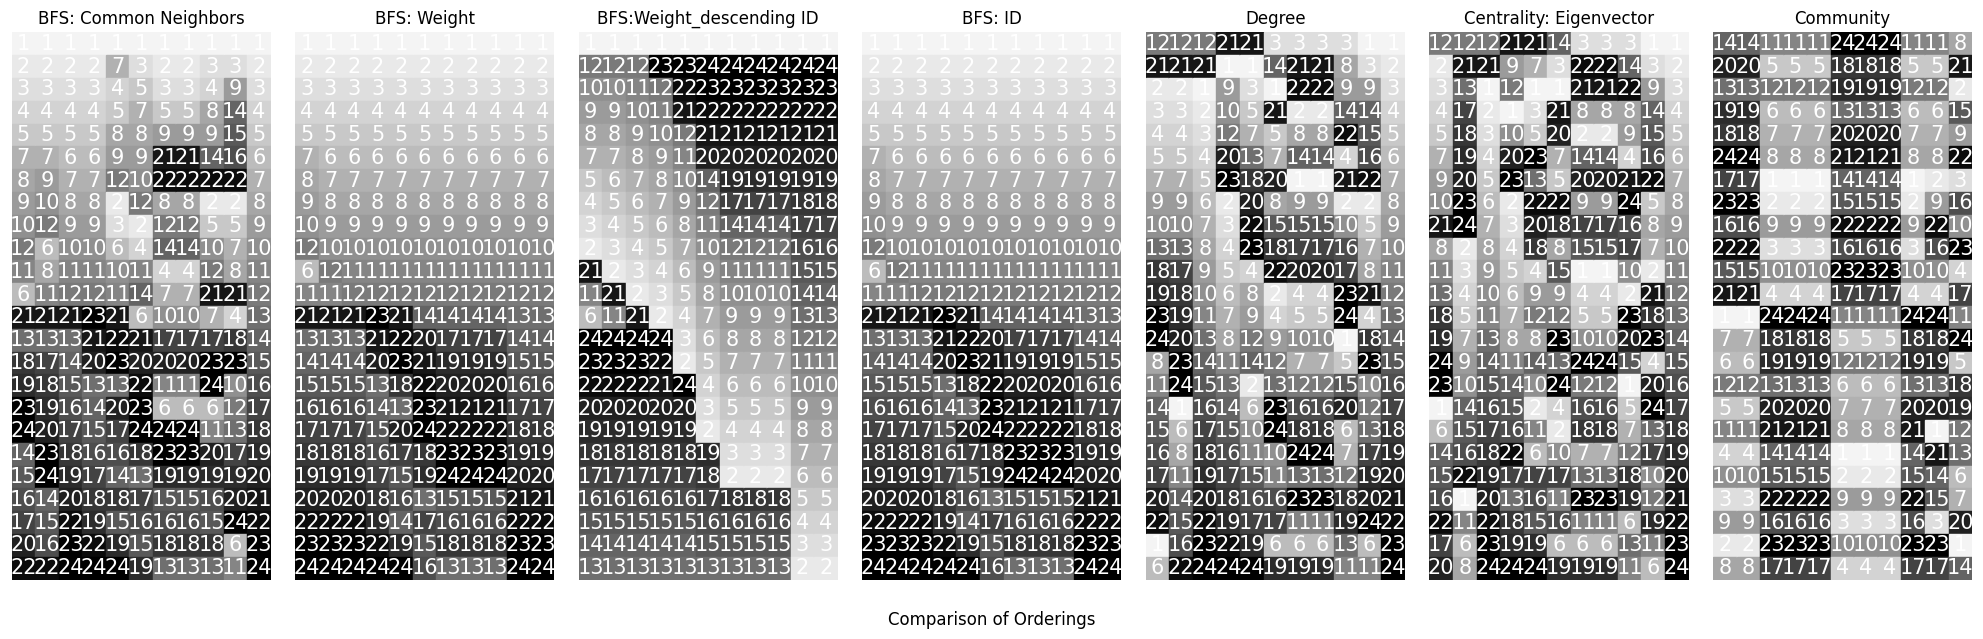

In [89]:
fig = draw_all_orderings(graphs=merge_graphs, data=merge_data, title="Comparison of Orderings", save=False)

Graphs received: {'t_1905': <networkx.classes.graph.Graph object at 0x00000198D88FD340>, 't_1906': <networkx.classes.graph.Graph object at 0x00000198D88FD3A0>, 't_1907': <networkx.classes.graph.Graph object at 0x00000198D88FD370>, 't_1908': <networkx.classes.graph.Graph object at 0x00000198D88FD3D0>, 't_1909': <networkx.classes.graph.Graph object at 0x00000198D88FD400>, 't_1910': <networkx.classes.graph.Graph object at 0x00000198D88FD490>, 't_1911': <networkx.classes.graph.Graph object at 0x00000198D88FD4C0>, 't_1912': <networkx.classes.graph.Graph object at 0x00000198D88FD520>, 't_1913': <networkx.classes.graph.Graph object at 0x00000198D88FD5B0>, 't_1914': <networkx.classes.graph.Graph object at 0x00000198D88FD5E0>, 't_1915': <networkx.classes.graph.Graph object at 0x00000198D88FD640>}
Graphs received: {'t_1905': <networkx.classes.graph.Graph object at 0x00000198D88FD340>, 't_1906': <networkx.classes.graph.Graph object at 0x00000198D88FD3A0>, 't_1907': <networkx.classes.graph.Graph o

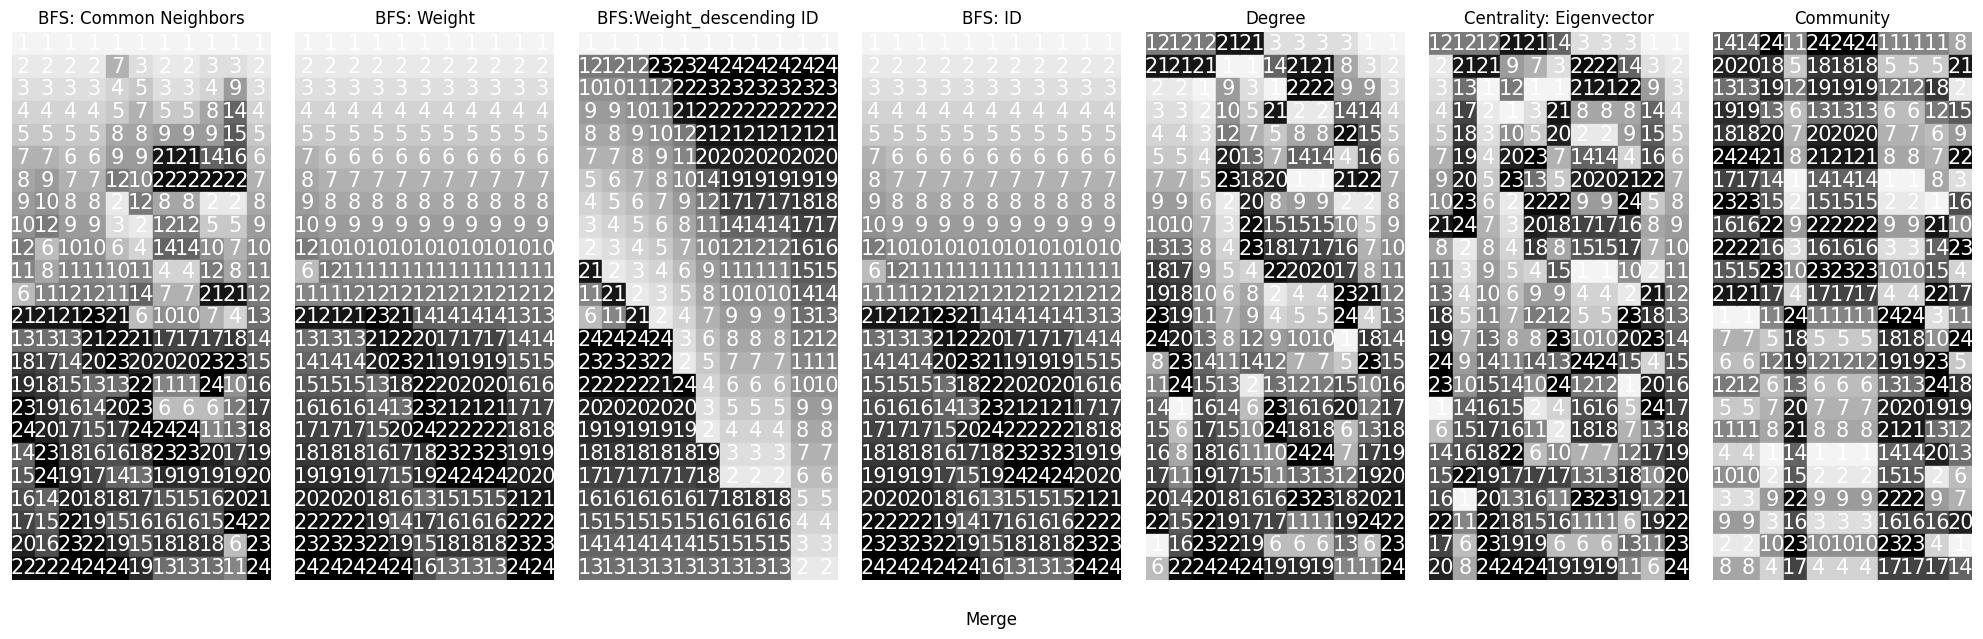

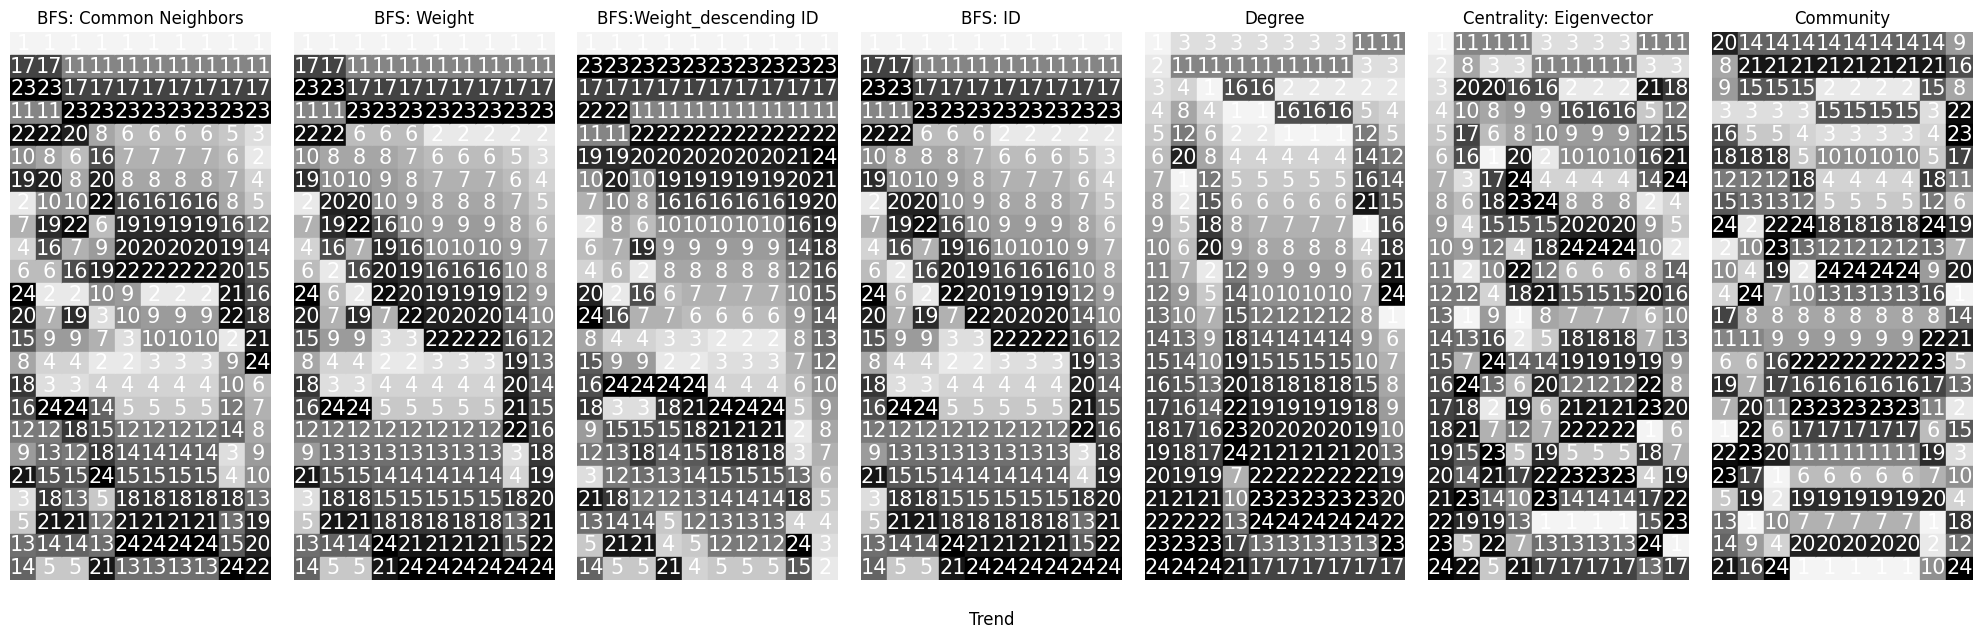

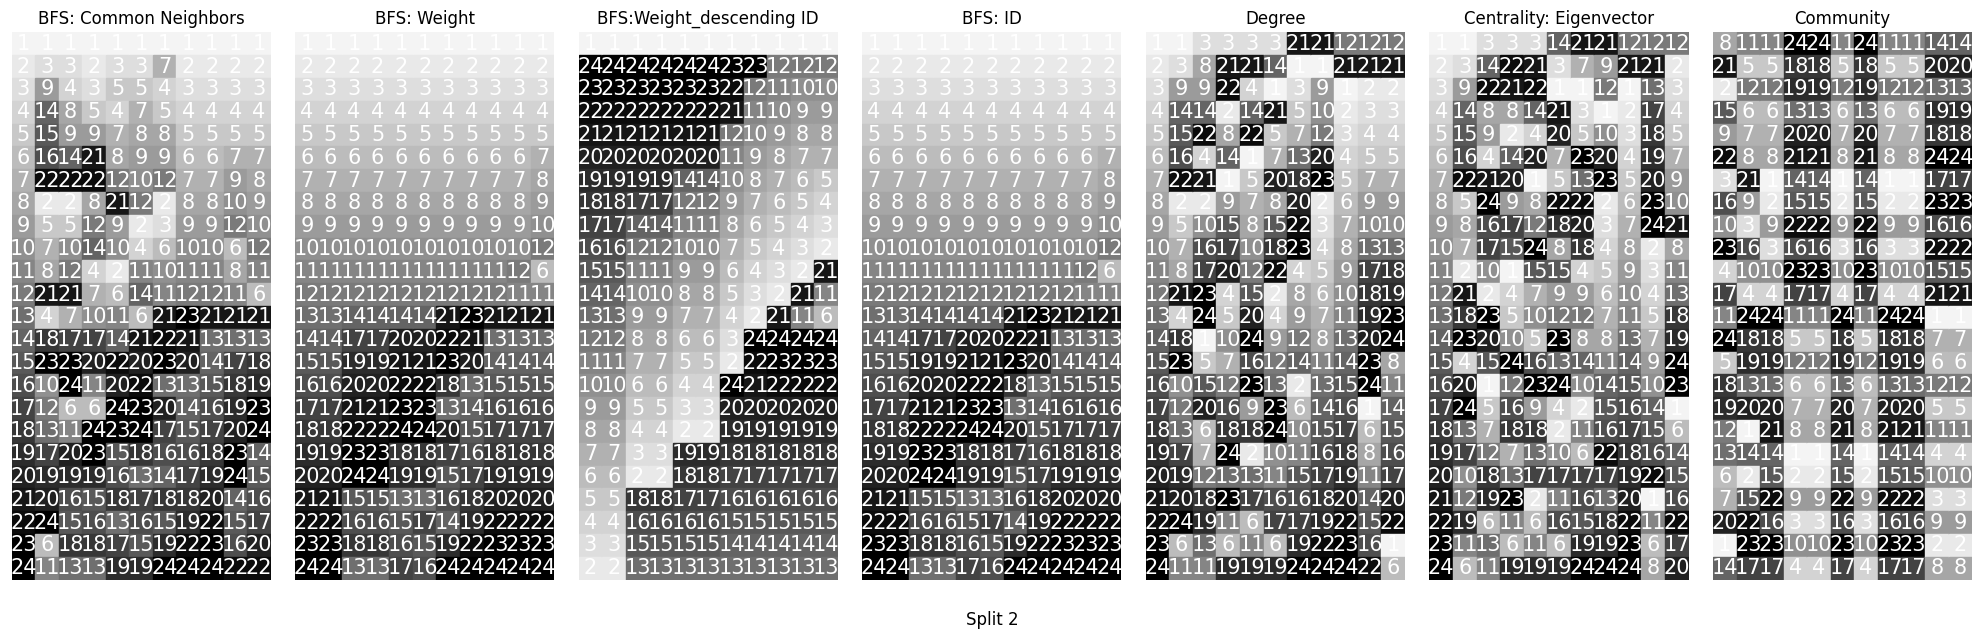

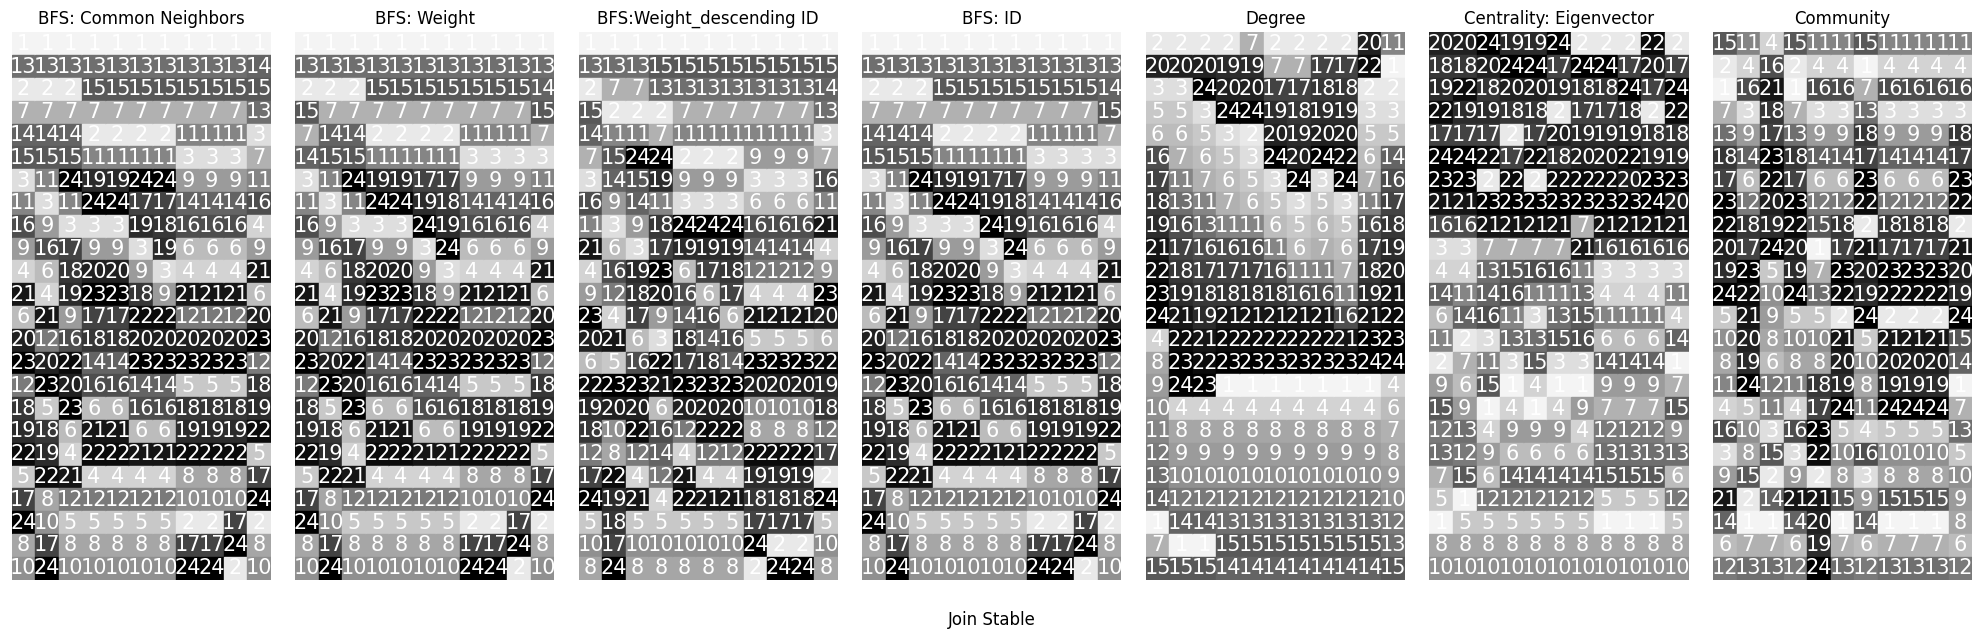

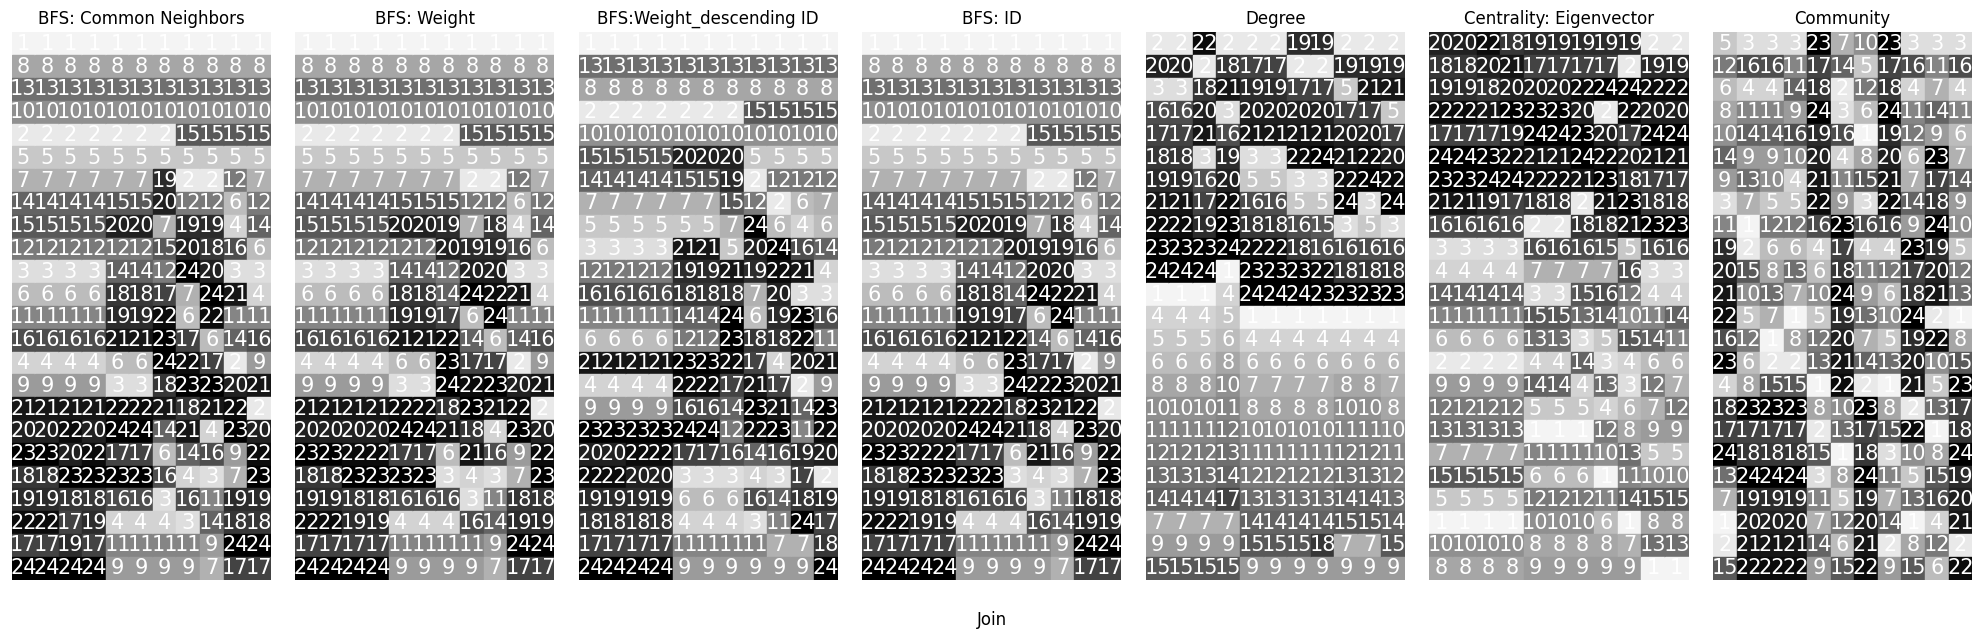

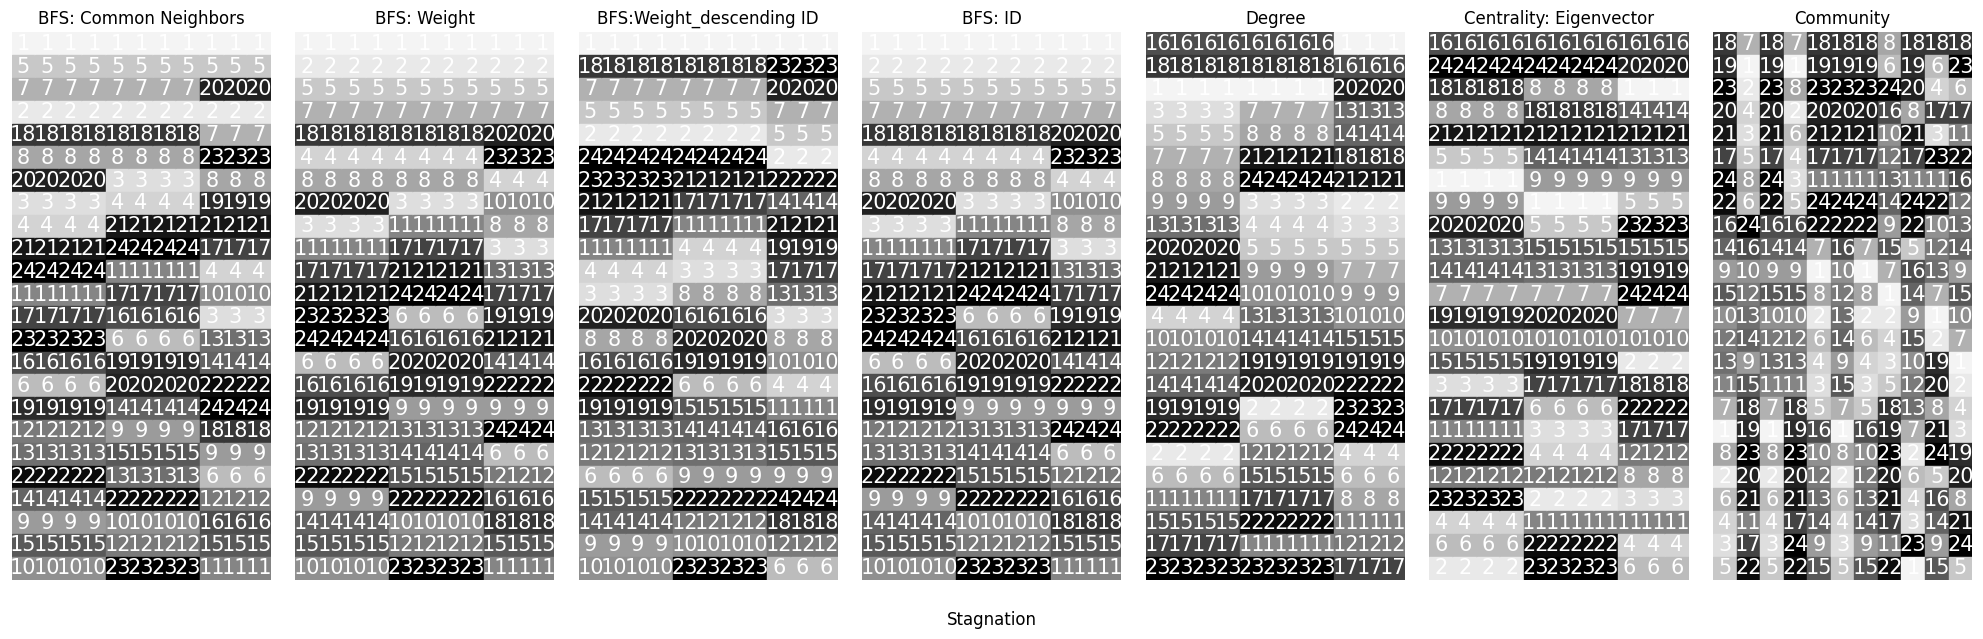

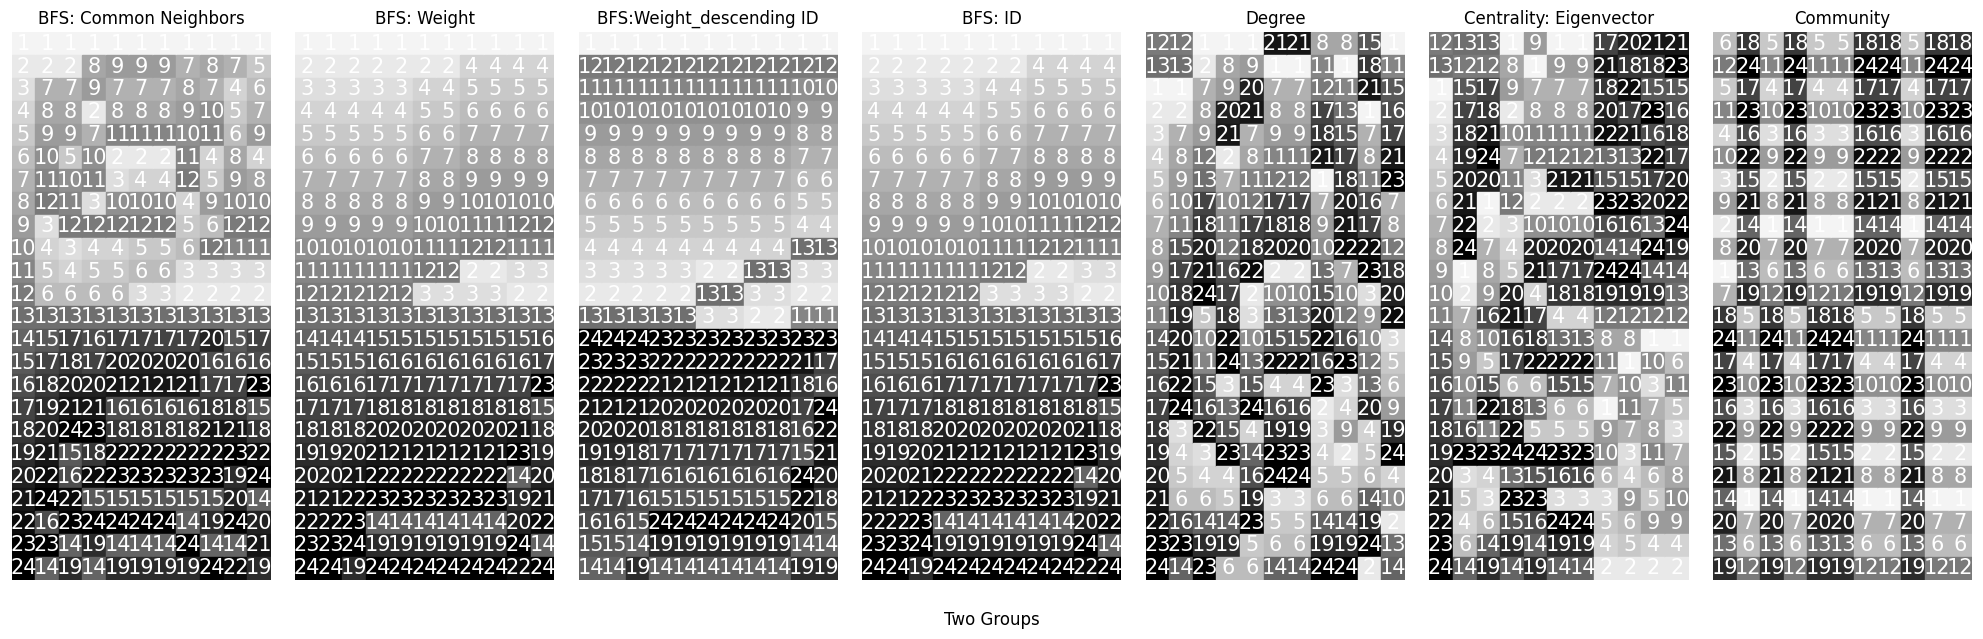

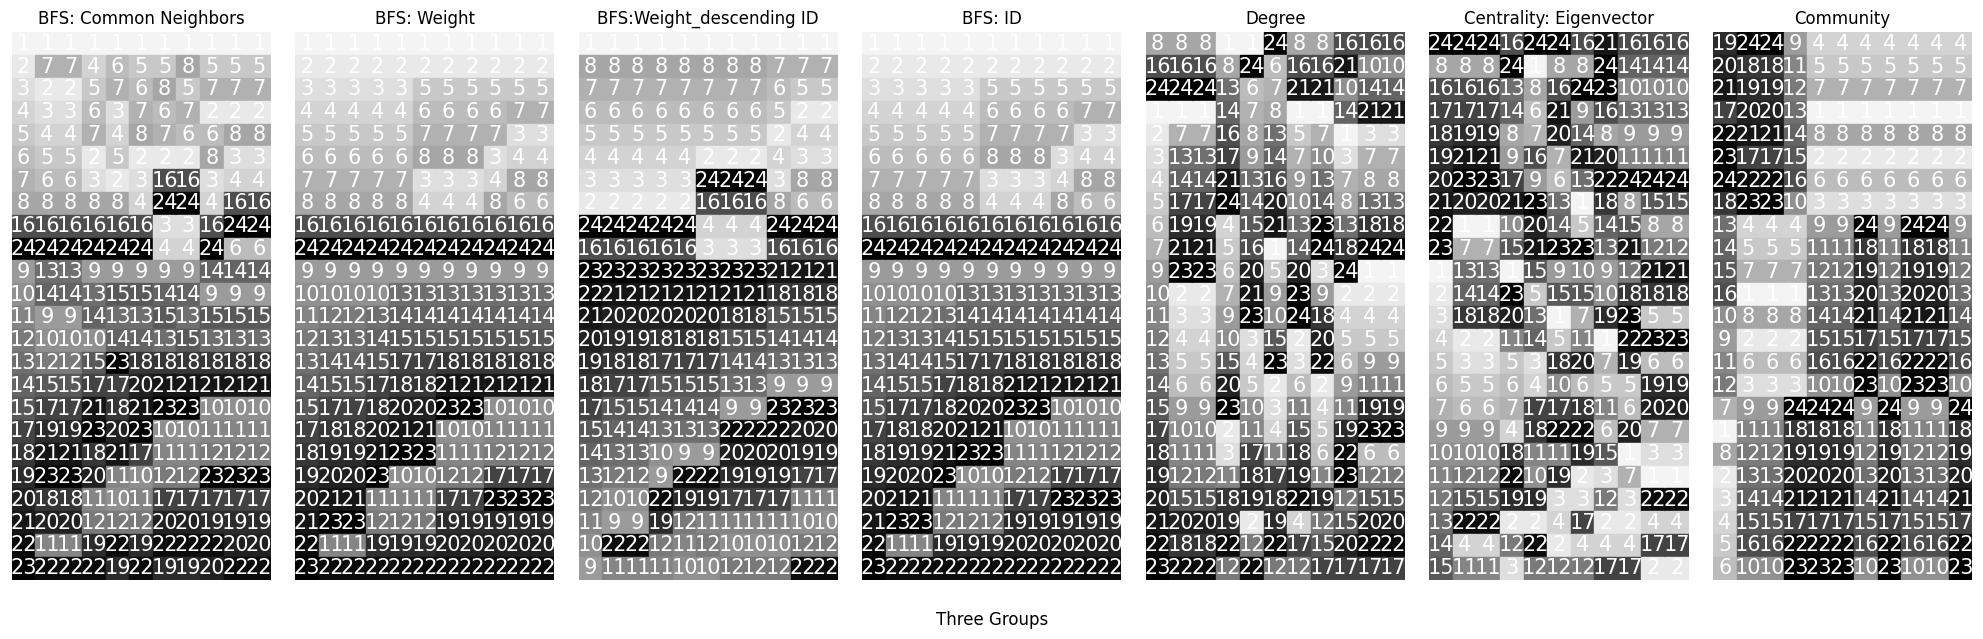

In [77]:
fig = draw_all_orderings(merge_graphs, merge_data, "Merge", save=True)
fig = draw_all_orderings(trend_graphs, trend_data, "Trend", save=True)
fig = draw_all_orderings(split2_graphs, split2_data, "Split 2", save=True)
fig = draw_all_orderings(join_stable_graphs, join_stable_data, "Join Stable", save=True)
fig = draw_all_orderings(join_graphs, join_data, "Join", save=True)
fig = draw_all_orderings(stagnation_graphs, stagnation_data, "Stagnation", save=True)
fig = draw_all_orderings(two_groups_graphs, two_groups_data, "Two Groups", save=True)
fig = draw_all_orderings(three_groups_graphs, three_groups_data, "Three Groups", save=True)

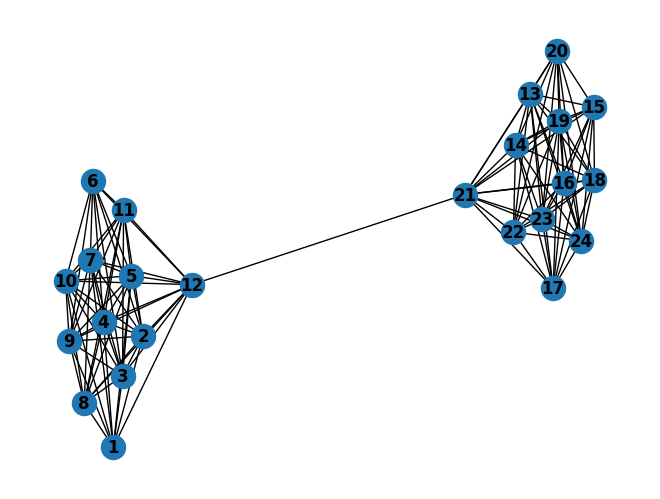

In [78]:
graph = split2_graphs["t_1915"]
nx.draw(graph, with_labels=True, font_weight='bold')

In [79]:
def get_weight(node1, node2, graph):
    return graph[node1][node2].get('weight', 1)

def get_nearest_neighbors(graph, node, k=1):
    nearest_neighbors = []
    visited = set()
    queue = [(0, node)]
    while queue:
        distance, current = heapq.heappop(queue)
        if current in visited:
            continue
        visited.add(current)
        if distance > k:
            break
        if current != node:  # Exclude the node itself
            nearest_neighbors.append(current)
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                heapq.heappush(queue, (distance + get_weight(current, neighbor, graph), neighbor))
    return nearest_neighbors

# Get all nearest neighbors of a node across all timestamps
def get_all_nearest_neighbors(graphs_dict, node, k=1):
    nearest_neighbors_set = set()
    for timestamp, graph in graphs_dict.items():
        nearest_neighbors = get_nearest_neighbors(graph, node, k)
        nearest_neighbors_set.update(set(nearest_neighbors))
    return nearest_neighbors_set
    
def get_common_neighbors(graph, node1, node2):
    return list(nx.common_neighbors(graph, node1, node2))

# Get all common neighbors of two nodes across all timestamps
def get_all_common_neighbors(graphs_dict, node1, node2):
    common_neighbors_set = set()
    for timestamp, graph in graphs_dict.items():
        common_neighors = get_common_neighbors(graph, node1, node2)
        common_neighbors_set.update(set(common_neighors))
    return common_neighbors_set


In [80]:
print("node 1 has these neighbors over the time", get_all_nearest_neighbors(stagnation_graphs, 1, 1))
print("node 7 has these neighbors over the time", get_all_nearest_neighbors(stagnation_graphs, 7, 1))

print("common neighbors between 1 and 7 over the time", get_all_common_neighbors(stagnation_graphs, 1, 7))

node 1 has these neighbors over the time {2, 5, 7, 18, 20, 23}
node 7 has these neighbors over the time {1, 3, 4, 5, 13}
common neighbors between 1 and 7 over the time {5}


{1, 2, 3}

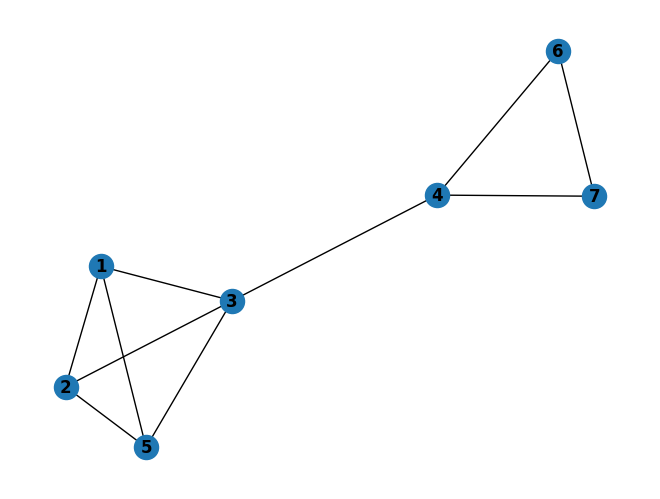

In [84]:
G = nx.Graph()
G.add_edge(1, 2, weight=1)
G.add_edge(1, 3, weight=1)
G.add_edge(1, 5, weight=1)
G.add_edge(2, 3, weight=1)
G.add_edge(3, 4, weight=1)
G.add_edge(3, 5, weight=1)
G.add_edge(2, 5, weight=1)
G.add_edge(4, 6, weight=1)
G.add_edge(7, 4, weight=1)
G.add_edge(7, 6, weight=1)


nx.draw(G, with_labels=True, font_weight='bold')
get_all_nearest_neighbors({"t_1905": G}, 5, k=1)

In [85]:
graph1 = merge_graphs["t_1905"]
graph2 = merge_graphs["t_1906"]

print()

print(get_common_neighbors(graph1, 13,20))
print(get_common_neighbors(graph1, 21,19))
print(get_common_neighbors(graph1, 21,20))
print(get_common_neighbors(graph1, 21,18))

print(get_common_neighbors(graph2, 21,13))
print(get_common_neighbors(graph2, 21,20))
print(get_common_neighbors(graph2, 21,18))



[14, 15, 16, 18, 19, 21, 22, 23, 24]
[13, 14, 15, 16, 17, 18, 20, 22, 23, 24]
[13, 14, 15, 16, 18, 19, 22, 23, 24]
[13, 14, 15, 16, 17, 19, 20, 22, 23, 24]
[14, 15, 16, 17, 18, 19, 20, 22, 23, 24]
[13, 14, 15, 16, 17, 18, 19, 22, 23, 24]
[13, 14, 15, 16, 17, 19, 20, 22, 23, 24]


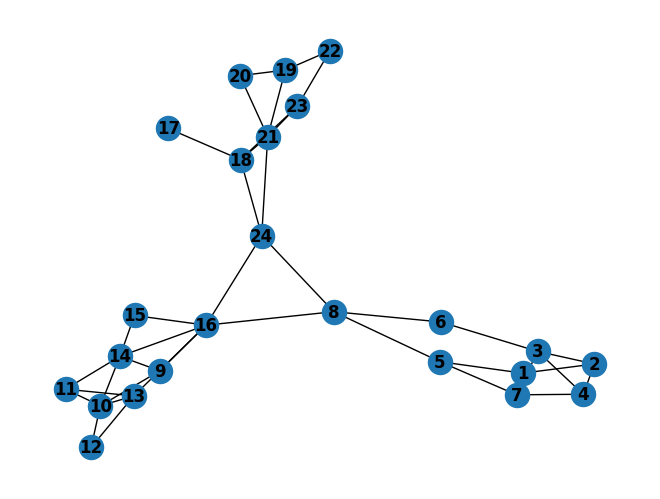

In [86]:
nx.draw(three_groups_graphs["t_1914"], with_labels=True, font_weight='bold')